# Projectile Motion
---
PRE-REQUISITES:
- [ode-solve-euler.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-euler.ipynb)

SEE ALSO:
- [oscillator.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/oscillator.ipynb)
- [pendulum.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/pendulum.ipynb)

In [1]:
%run euler_step.py
%run euler_midpt_step.py
%run euler_meanval_step.py

<IPython.core.display.Javascript object>


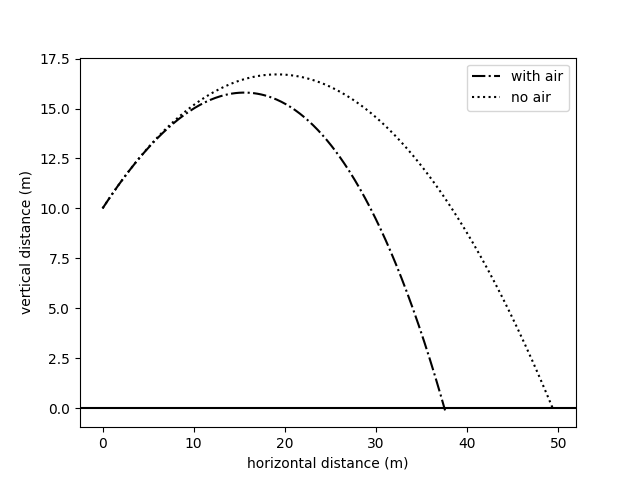

In [112]:
# projectile
"""
Program to compute the motion of a projectile
"""

import numpy as np

# projectile rhs function
def f (t, x):
    #input array
    xx = x[0]
    yy = x[1]
    vx = x[2]
    vy = x[3]
    speed = np.sqrt(vx**2 + vy**2)
    #acceleration
    ax = -0.5*drag*rho*area/mass*speed*vx
    ay = -grav - 0.5*drag*rho*area/mass*speed*vy
    #output array
    dxdt = np.zeros(4)
    dxdt[0] = vx
    dxdt[1] = vy
    dxdt[2] = ax
    dxdt[3] = ay
    return dxdt

# set physical parameters
grav = 9.81    #gravitational acceleration (in m/s^2) 
mass = 0.145   #mass of projectile (in kg)
area = 4.3e-3  #cross-sectional area of projectile (in m^2) 
drag = 0.65    #drag coefficient (dimensionless) 
rho = 1.20     #density of air (in kg/m^3)

# set initial position
x0 = 0.0
y0 = 10.0

# set intial velocity
v0 = 20.0 
angle = 35.0
vx0 = v0*np.cos(angle*np.pi/180)
vy0 = v0*np.sin(angle*np.pi/180)

# number of steps, time grid, stepsize
tStart = 0.0
tEnd = 10.0
maxSteps = 1000
h = (tEnd - tStart)/maxSteps
t = np.linspace(tStart, tEnd, maxSteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays
Xi = np.zeros((4, maxSteps + 1))
Xi[0] = x0 
Xi[1] = y0
Xi[2] = vx0
Xi[3] = vy0

xNoAir = np.zeros_like(t)
yNoAir = np.zeros_like(t)
xNoAir[0] = x0
yNoAir[0] = y0

# initialize halt flags
haltAir = 0
haltNoAir = 0

# numerical solution 
# loop until projectile reaches ground, or maxSteps has been reached
for i in range(0, maxSteps):

    # apply ODE-solver step
    Xi[:,i+1] = euler_midpt_step(t[i], Xi[:,i], f, h)
    t[i+1] = t[i] + h

    xNoAir[i+1] = x0 + vx0*t[i+1]
    yNoAir[i+1] = y0 + vy0*t[i+1] - 0.5*grav*t[i+1]**2

    # test if projectile with air resistance has reached the ground
    # by checking y-position for a change in sign (or zero)
    if Xi[1,i]*Xi[1,i+1] <= 0:
        # if yes, set halt flag
        haltAir = i+1

    # test if projectile with no air resistance has reached the ground
    # by checking y-position for a change in sign (or zero)
    if yNoAir[i]*yNoAir[i+1] <= 0:
        # if yes, set halt flag
        haltNoAir = i+1
    
    # test if both projectiles have reached the ground
    if ((haltAir != 0) & (haltNoAir != 0)):
        
        #if yes, truncate output arrays using halt flags
        Xi = Xi[:, :haltAir + 1]
        xNoAir = xNoAir[:haltNoAir + 1]
        yNoAir = yNoAir[:haltNoAir + 1]

        # then break out of the for loop
        break  

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.plot(Xi[0], Xi[1],'k-.', label='with air')
ax1.plot(xNoAir, yNoAir,'k:', label='no air')
ax1.axhline(y=0, xmin=0, xmax=1, color='k')
ax1.set_xlabel('horizontal distance (m)')
ax1.set_ylabel('vertical distance (m)')
ax1.legend(loc='upper right')
fig.show()